In [1]:
import requests
import json
json_years = {}
for year in range(2000, 2024):
    try:
        response = requests.get("https://incidents.fire.ca.gov/umbraco/api/IncidentApi/GeoJsonList?year=" + str(year))
        json_years[year] = response.json()
        print(year, len(response.json()["features"]))
    except E:
        print(year, E)

2000 0
2001 0
2002 0
2003 10
2004 21
2005 14
2006 79
2007 73
2008 55
2009 72
2010 66
2011 124
2012 134
2013 159
2014 115
2015 157
2016 184
2017 436
2018 310
2019 264
2020 258
2021 186
2022 151
2023 31


In [1]:
import pandas as pd
import geopandas
fires_gdf = geopandas.GeoDataFrame()
for year in range(2003, 2024):
    fires_temp = geopandas.GeoDataFrame.from_features(json_years[year]["features"])
    fires_gdf = geopandas.GeoDataFrame(pd.concat([fires_gdf, fires_temp], ignore_index=True))

NameError: name 'json_years' is not defined

In [56]:
fires_gdf = geopandas.GeoDataFrame(
    fires_gdf, geometry=geopandas.points_from_xy(fires_select.Longitude, fires_select.Latitude), crs="EPSG:4326"
)

In [57]:
print(fires_gdf.crs)

EPSG:4326


In [ ]:
fires_select = fires_gdf
fires_plot = fires_select.to_crs(world.crs).clip(world)

<Axes: >

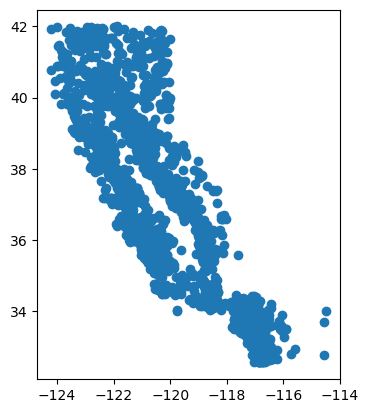

In [60]:
import matplotlib.pyplot as plt
fires_plot.plot()

In [54]:
# fires_select = fires_gdf[(fires_gdf.Latitude < 44) & (fires_gdf.Latitude > 30) & (fires_gdf.Longitude < -113) & (fires_gdf.Longitude > -125)]
# fires_select = fires_select[~fires_select["AcresBurned"].isnull()]
# fires_select["AcresBurned"].replace(to_replace = 0, value = 1, inplace=True)

In [26]:
jsonfile = ('/Users/christopher/Downloads/ark28722-s73w23-geojson.json')
world = geopandas.read_file(jsonfile)

/Users/christopher/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


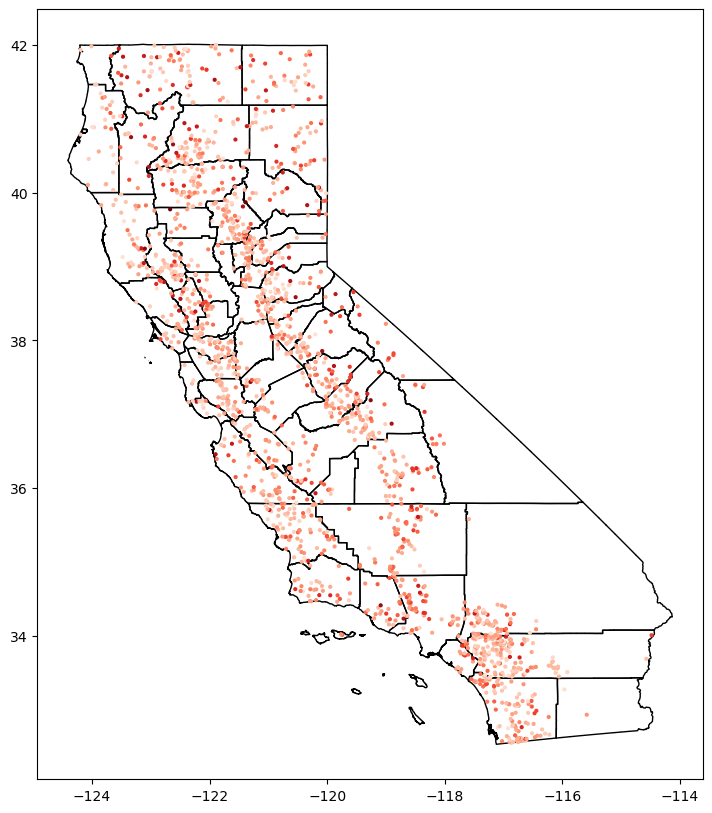

In [61]:
import numpy as np
ax = world.plot(color = "none",edgecolor = 'black', figsize = (10,10))
plt.scatter(fires_plot["Longitude"], fires_plot["Latitude"], c=np.log(fires_plot["AcresBurned"]), cmap="Reds", s=4)
plt.show()

In [62]:
fires_plot["Started"]

2583    2021-06-09T13:53:00Z
1305    2017-05-25T18:15:00Z
2244    2019-10-22T19:20:44Z
2320    2020-06-09T21:51:40Z
1684    2017-10-13T15:40:00Z
                ...         
1529    2017-08-13T12:41:00Z
2050    2019-06-16T20:33:00Z
1164    2016-07-19T14:09:00Z
1562    2017-08-29T15:39:00Z
991     2015-07-21T17:00:00Z
Name: Started, Length: 2062, dtype: object

In [65]:
fires_plot["geometry"]

2583    POINT (-117.34832 33.31571)
1305    POINT (-117.39818 33.34988)
2244    POINT (-117.40372 33.35115)
2320    POINT (-117.47166 33.37579)
1684    POINT (-117.46709 33.38613)
                   ...             
1529    POINT (-122.94010 41.99279)
2050    POINT (-122.40157 41.94622)
1164    POINT (-122.59328 41.96191)
1562    POINT (-121.90077 41.99483)
991     POINT (-121.89123 41.99934)
Name: geometry, Length: 2062, dtype: geometry

In [67]:
fires_plot.to_file('california_fires.geojson', driver='GeoJSON') 

In [4]:
import requests
response = requests.get("https://incidents.fire.ca.gov/umbraco/api/IncidentApi/GeoJsonList?year=2015")
print(len(response.json()))

2


In [5]:
import requests
response = requests.get("https://incidents.fire.ca.gov/umbraco/api/IncidentApi/GeoJsonList?year=2016")
print(len(response.json()))

2


In [18]:
import requests
response = requests.get("https://incidents.fire.ca.gov/umbraco/api/IncidentApi/GeoJsonList?year=2003")
print(response.json())

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [0.0, 0.0]}, 'properties': {'Name': 'Paradise Fire', 'Final': True, 'Updated': '2003-11-06T07:00:00Z', 'Started': '2003-10-26T01:30:00Z', 'AdminUnit': 'CDF San Diego Unit', 'AdminUnitUrl': None, 'County': 'San Diego', 'Location': 'Valley Center', 'AcresBurned': 56700.0, 'PercentContained': 100.0, 'ControlStatement': 'Expected control November 15, 2003 at 8 a.m.', 'AgencyNames': 'CDF San Diego Unit, CDF, US Forest Service, Dept. Fish and Game, local government agencies', 'Longitude': 0.0, 'Latitude': 0.0, 'Type': '', 'UniqueId': 'a439b26e-4f99-41f5-9ac2-625b5a98bade', 'Url': 'https://incidents.fire.ca.gov/incidents/2003/10/26/paradise-fire/', 'ExtinguishedDate': '2003-11-06T07:00:00Z', 'ExtinguishedDateOnly': '2003-11-06', 'StartedDateOnly': '2003-10-26', 'IsActive': False, 'CalFireIncident': True, 'NotificationDesired': False}}, {'type': 'Feature', 'geometry': {'type': 'Point', '